In [18]:
import diplib as dip
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 72

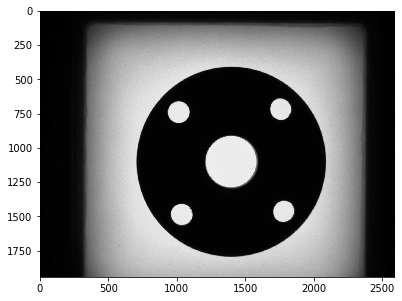

In [19]:
img = dip.ImageRead('N6uqw.jpg')
img.SetPixelSize(0.042, "mm")
img.Show()

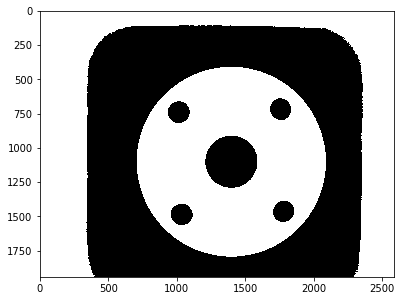

In [20]:
obj = ~dip.Threshold(dip.Gauss(img))[0] #dip.Threshold Returns a tuple, the first element is the thresholded image, the second one is the threshold value. ~取反
obj.Show()

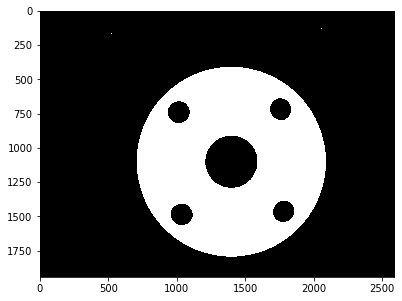

In [21]:
obj = dip.EdgeObjectsRemove(obj)    #移除的都是边缘对象 像素值为1的对象
obj.Show()

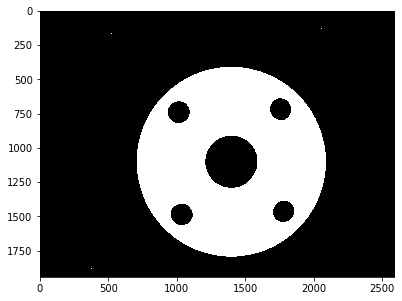

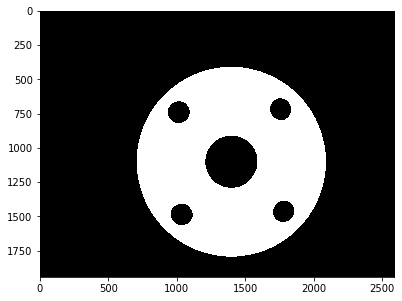

In [22]:
# 先闭后开 闭操作可以填充物体内部的空洞，开操作可以去除物体外部的小物体
obj_close = dip.Closing(obj, 9)
obj_close.Show()
obj_open = dip.Opening(obj_close, 9)
obj_open.Show()


In [23]:
lab_object = dip.Label(obj_open)   #只会在物体像素值为1的地方标记 因此这次标记的是大圆 注意这里面的面积没有包括小圆 因为小圆的像素值为0
print(lab_object)

2D Scalar image:
    data type:      UINT32
    sizes:          {2590, 1942}
    pixel size:     0.042 mm x 0.042 mm
    strides:        {1, 2590}, tensor stride 1
    data pointer:   0000028C9B71E040 (shared among 1 images)
    origin pointer: 0000028C9B71E040



In [24]:
msr_object = dip.MeasurementTool.Measure(lab_object, img, ['Size'])
print(msr_object)

  |       Size | 
- | ---------- | 
  |            | 
  |     (mm^2) | 
- | ---------- | 
1 |      2301. | 



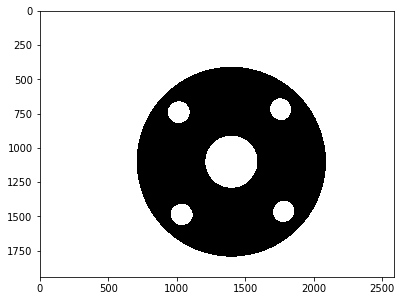

In [25]:
obj_holes = ~obj_open
obj_holes.Show()

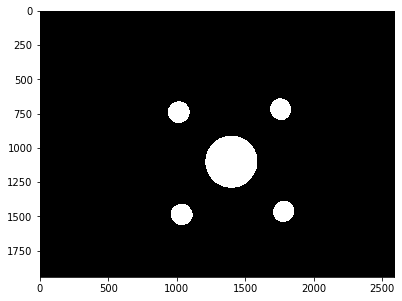

In [26]:
obj_holes = dip.EdgeObjectsRemove(obj_holes)
obj_holes.Show()

In [31]:
lab_holes = dip.Label(obj_holes)  #这次标记的是小圆
msr_holes = dip.MeasurementTool.Measure(lab_holes, img, ['Size', 'DimensionsEllipsoid'])
print(msr_holes)

  |       Size |     DimensionsEllipsoid |                                   Mu | 
- | ---------- | ----------------------- | ------------------------------------ | 
  |            |      axis0 |      axis1 |     Mu_0_0 |     Mu_1_1 |     Mu_1_0 | 
  |     (mm^2) |       (mm) |       (mm) |     (mm^2) |     (mm^2) |     (mm^2) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      33.56 |      6.668 |      6.409 |      2.746 |      2.600 |   -0.07684 | 
2 |      35.17 |      6.733 |      6.650 |      2.777 |      2.821 |    0.02721 | 
3 |      199.8 |      15.98 |      15.92 |      15.93 |      15.86 |    0.05177 | 
4 |      33.25 |      6.674 |      6.344 |      2.687 |      2.613 |     0.1290 | 
5 |      34.42 |      6.722 |      6.521 |      2.690 |      2.791 |   -0.06570 | 



有用的也就是霍夫模块和测量模块了，霍夫功能在test1_1.py进行了测试

In [28]:
sz = msr_holes['Size']
holeAreas = []
for i in sz.Objects():
    holeAreas.append(sz[i][0])

In [29]:
objectArea = msr_object[1]['Size'][0]
objectArea += sum(holeAreas)
print('Object diameter = %f mm' % (2 * math.sqrt(objectArea / math.pi)))

Object diameter = 57.951256 mm


In [30]:
for a in holeAreas:
    print('Hole diameter = %f mm' % (2 * math.sqrt(a / math.pi)))

Hole diameter = 6.536479 mm
Hole diameter = 6.691498 mm
Hole diameter = 15.949196 mm
Hole diameter = 6.506516 mm
Hole diameter = 6.619958 mm
